## Test rescaling

In [1]:
import numpy as np
from scipy.interpolate import interpolate
import os
import glob
from matplotlib import pyplot as plt
import xarray as xr
import xesmf as xe
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/utils"
os.chdir(path)
import dataset
import rescaling

In [2]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003"
os.chdir(path)
filenames = dataset.getfiles()
print(filenames[0:24])

['lffd20030101000000.nc', 'lffd20030101010000.nc', 'lffd20030101020000.nc', 'lffd20030101030000.nc', 'lffd20030101040000.nc', 'lffd20030101050000.nc', 'lffd20030101060000.nc', 'lffd20030101070000.nc', 'lffd20030101080000.nc', 'lffd20030101090000.nc', 'lffd20030101100000.nc', 'lffd20030101110000.nc', 'lffd20030101120000.nc', 'lffd20030101130000.nc', 'lffd20030101140000.nc', 'lffd20030101150000.nc', 'lffd20030101160000.nc', 'lffd20030101170000.nc', 'lffd20030101180000.nc', 'lffd20030101190000.nc', 'lffd20030101200000.nc', 'lffd20030101210000.nc', 'lffd20030101220000.nc', 'lffd20030101230000.nc']


In [3]:
test_2km = dataset.new_dataset(filenames, 172, 173)
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/data"
os.chdir(path)
test_2km

<xarray.Dataset>
Dimensions:     (time: 24, rlon: 1542, rlat: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    lon         (rlat, rlon) float32 -11.06 -11.04 -11.02 ... 34.27 34.31 34.34
    lat         (rlat, rlon) float32 29.61 29.61 29.62 29.62 ... 61.11 61.1 61.1
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (time, rlat, rlon) float32 293.9 293.9 293.9 ... 283.5 283.5
    RELHUM_2M   (time, rlat, rlon) float32 79.83 79.32 79.08 ... 79.15 79.35
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

In [4]:
test_2km = test_2km.drop('lon')
test_2km = test_2km.drop('lat')

### Downscaling

#### xESMF

### interp2D

In [5]:
rlon = np.arange(-18.86, 11.9, 0.12)
rlat = np.arange(-14.86, 15.9, 0.12)

fun = interpolate.interp2d(rlon, rlat, ups_ds.T_2M.isel(time = 0), kind='linear') # kind could be {'linear', 'cubic', 'quintic'}
newlon = np.arange(-18.86, 11.98, 0.02)
newlat = np.arange(-14.86, 15.98, 0.02)
newvar = fun(newlon, newlat)
newvar

NameError: name 'ups_ds' is not defined

## Test

In [6]:
ingrid = rescaling.create_grid(-18.86, 11.98, 0.02, -14.86, 15.98, 0.02)
outgrid = rescaling.create_grid(-18.86, 11.9, 0.12, -14.86, 15.9, 0.12)

In [7]:
ups_ds = rescaling.upscale(test_2km, ingrid, outgrid)

/users/nchabloz/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/miniconda3/conda/lib/python3.10/site-packages/xesmf/frontend.py:597: UserWarning: Using dimensions ('rlat', 'rlon') from data variable T_2M as the horizontal dimensions for the regridding.
  warnings.warn(


In [8]:
ups_ds

<xarray.Dataset>
Dimensions:     (time: 24, rlat: 257, rlon: 257)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-22T23:00:00
    height_2m   float32 2.0
    height_10m  float32 10.0
  * rlon        (rlon) float64 -18.86 -18.74 -18.62 -18.5 ... 11.62 11.74 11.86
  * rlat        (rlat) float64 -14.86 -14.74 -14.62 -14.5 ... 15.62 15.74 15.86
Data variables:
    T_2M        (time, rlat, rlon) float32 293.9 293.8 293.9 ... 283.5 283.8
    RELHUM_2M   (time, rlat, rlon) float32 79.63 81.79 83.16 ... 78.72 78.44
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  conservative

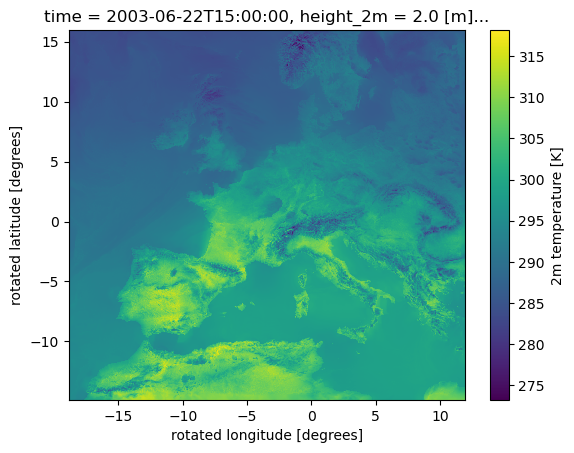

In [9]:
test_2km.T_2M.isel(time = 15).plot()